In [5]:
import numpy as np
from scipy import integrate
from matplotlib.pylab import *

source https://learnche.org/3E4/Assignment_6_-_2010_-_Solutions

In [112]:
def dy_dt(t, y):
    """ 
    y1 = dN/dt
    y2 = dB/dt
    
    INPUTS:    
        t: time 
        y: the time varying concentrations: N and B
    """
    
    V = 1600.0   # m^3    
    Y_B = 0.8    # efficiency
    mu_max = 5.0 # 1/day
    K = 20.0     #g/m^3
    N_in = 100.0 #g/m^3
    
    F = 50.0   # m^3/day
#     F = 5000 + 900*sin(2*np.pi/24*t -np.pi/5) # m^3/day
    
#     # Change these time values
#     if t >= 75 and t <= 85:
#         N_in = 150.0
#     else:
#         N_in = 100.0 # g/m^3
            
    N = y[0]
    B = y[1]
    y = np.zeros((2,1))
    y[0] = F/V*(N_in - N) - (1/Y_B)*(mu_max*N/(K+N)) * B
    y[1] = -B*F/V + (mu_max*N/(K+N)) * B 
    return(y)

In [113]:
Y_B = [0.9, 0.5, 0.3]

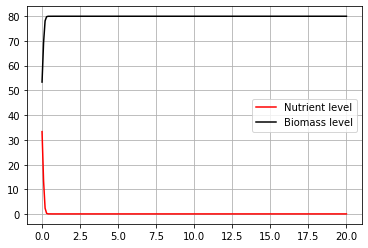

In [114]:
r = integrate.ode(dy_dt).set_integrator('vode', method='bdf')

# Part 1:
ICs = [100.0, 20.0]

# Part 2: use the steady-state solution
ICs = [33.33333333333,  53.3333333333]
t_0 = 0.0
r.set_initial_value(ICs, t_0)
t_final = 20.0
dt = 0.1

# Create vectors to store the solutions in; 
#     add extra space for intial condition
n_steps = np.floor((t_final - t_0)/dt) + 1
time = np.zeros(int(n_steps))
N = np.zeros(int(n_steps))
B = np.zeros(int(n_steps))
N[0], B[0] = ICs
k = 1

while r.successful() and r.t < t_final:
    r.integrate(r.t + dt)
    time[k] = r.t

    N[k] = r.y[0]
    B[k] = r.y[1]
    k += 1

# Clear figure window from previous simulation
clf()
plot(time, N, 'r', label='Nutrient level')
plot(time, B, 'k', label='Biomass level')
legend(loc='best')
grid('on')

In [51]:
dy_dt(t,y)

array([[262.5 ],
       [ -3.75]])

In [107]:
while r.successful() and r.t < t_final:
    r.integrate(r.t + dt)
    time[k] = r.t

    N[k] = r.y[0]
    B[k] = r.y[1]
    k += 1

In [108]:
N

array([33.33333333, 13.47643025,  2.44513015,  0.34941887,  0.14501722,
        0.12742166,  0.12592521,  0.12579809,  0.12578722,  0.12578625,
        0.12578619,  0.12578611,  0.12578616,  0.12578634,  0.12578622,
        0.12578618,  0.12578618,  0.12578615,  0.12578615,  0.12578616,
        0.12578616,  0.12578616,  0.12578615,  0.12578616,  0.12578615,
        0.12578617,  0.12578617,  0.12578617,  0.12578616,  0.12578616,
        0.12578617,  0.12578616,  0.12578617,  0.12578616,  0.12578618,
        0.12578617,  0.12578617,  0.12578616,  0.12578616,  0.12578616,
        0.12578616,  0.12578616,  0.12578617,  0.12578617,  0.12578617,
        0.12578616,  0.12578616,  0.12578616,  0.12578617,  0.12578616,
        0.12578617,  0.12578616,  0.12578617,  0.12578616,  0.12578616,
        0.12578617,  0.12578616,  0.12578617,  0.12578616,  0.12578616,
        0.12578616,  0.12578617,  0.12578616,  0.12578617,  0.12578617,
        0.12578615,  0.12578616,  0.12578616,  0.12578616,  0.12